In [1]:
# Load kymograph.
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.util import img_as_float
raw_im = imread('/home/jiongyi/Documents/johnny/TIRF Candy Cane Raw Data and Kymographs/Candy Cane Kymographs/1uMactin_375nMTm1A/Expt6_375nm_Pos1_Kymographs/Expt6_Pos1_Kymograph_5_filament2_Tm1ACh.jpg')
gray_im = img_as_float(rgb2gray(raw_im))

In [2]:
# Enhance contrast.
from skimage.exposure import equalize_adapthist
enhanced_im = equalize_adapthist(gray_im, kernel_size = [250, 100])

/home/jiongyi/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [3]:
# Close.
from skimage.morphology import closing, dilation, rectangle, disk, binary_closing
closing_rectangle = rectangle(15, 3, dtype = float)
closed_im = closing(enhanced_im, selem = closing_rectangle)

In [4]:
# Blurr and binarize.
from skimage.filters import gaussian, threshold_isodata, threshold_otsu
from numpy import max
gauss_im = gaussian(closed_im, sigma = 4)

In [5]:
# Clean up binarized image.
from scipy.ndimage.morphology import binary_fill_holes
from skimage.segmentation import find_boundaries
from skimage.feature import canny

canny_im = canny(gauss_im, sigma = 2)
canny_im = binary_closing(canny_im, disk(3))
canny_im[-1, :] = True
filled_im = binary_fill_holes(canny_im)
boundaries_im = find_boundaries(filled_im)

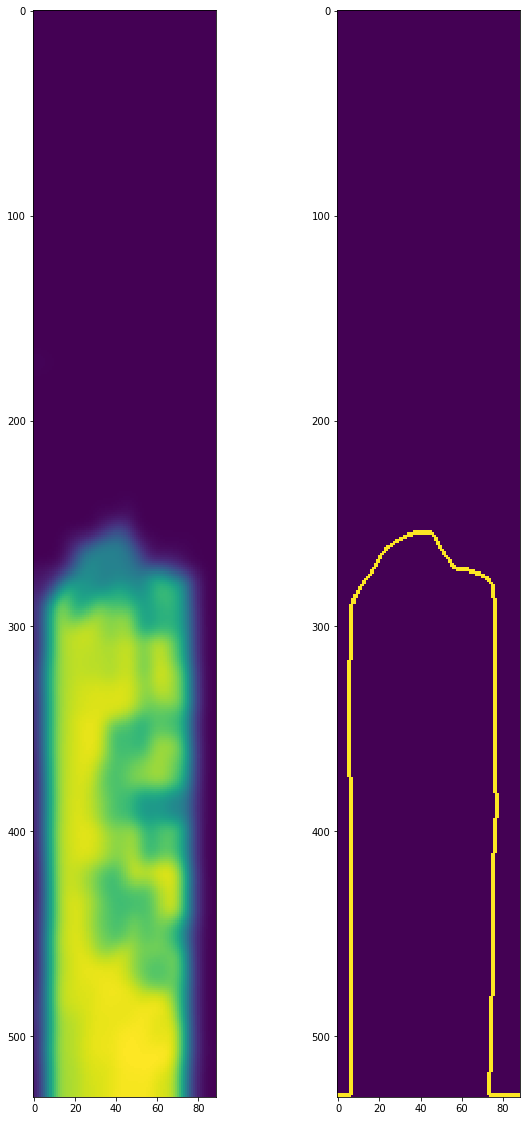

In [6]:
# Display results.
%matplotlib inline
from matplotlib.pyplot import subplots
figure_hand, axes_hand = subplots(nrows = 1, ncols = 2)
figure_hand.set_figwidth(10)
figure_hand.set_figheight(20)
axes_hand[0].imshow(gauss_im)
axes_hand[1].imshow(boundaries_im)